In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv('../data/temps.csv')
df.columns = ['date', 'temp']
df.head(10)

,date,temp
0,2024-12-03 20:40:40,28.15
1,2024-12-03 20:30:40,28.05
2,2024-12-03 20:20:40,27.89
3,2024-12-03 20:10:40,27.72
4,2024-12-03 20:00:40,27.52
5,2024-12-03 19:50:40,27.37
6,2024-12-03 19:40:40,27.28
7,2024-12-03 19:30:40,27.09
8,2024-12-03 19:20:40,26.87
9,2024-12-03 19:10:40,26.66


In [4]:
df['temp'].describe()

count    179573.000000
mean         28.881848
std           2.068775
min          18.330000
25%          27.890000
50%          28.990000
75%          30.090000
max          52.570000
Name: temp, dtype: float64

In [5]:
# with open("./data/temps.csv", "r") as file:
#     with open('./data/temps2.csv', 'a') as the_file:
#         for line in file:
#             the_file.write(line[:-255]+'\n')


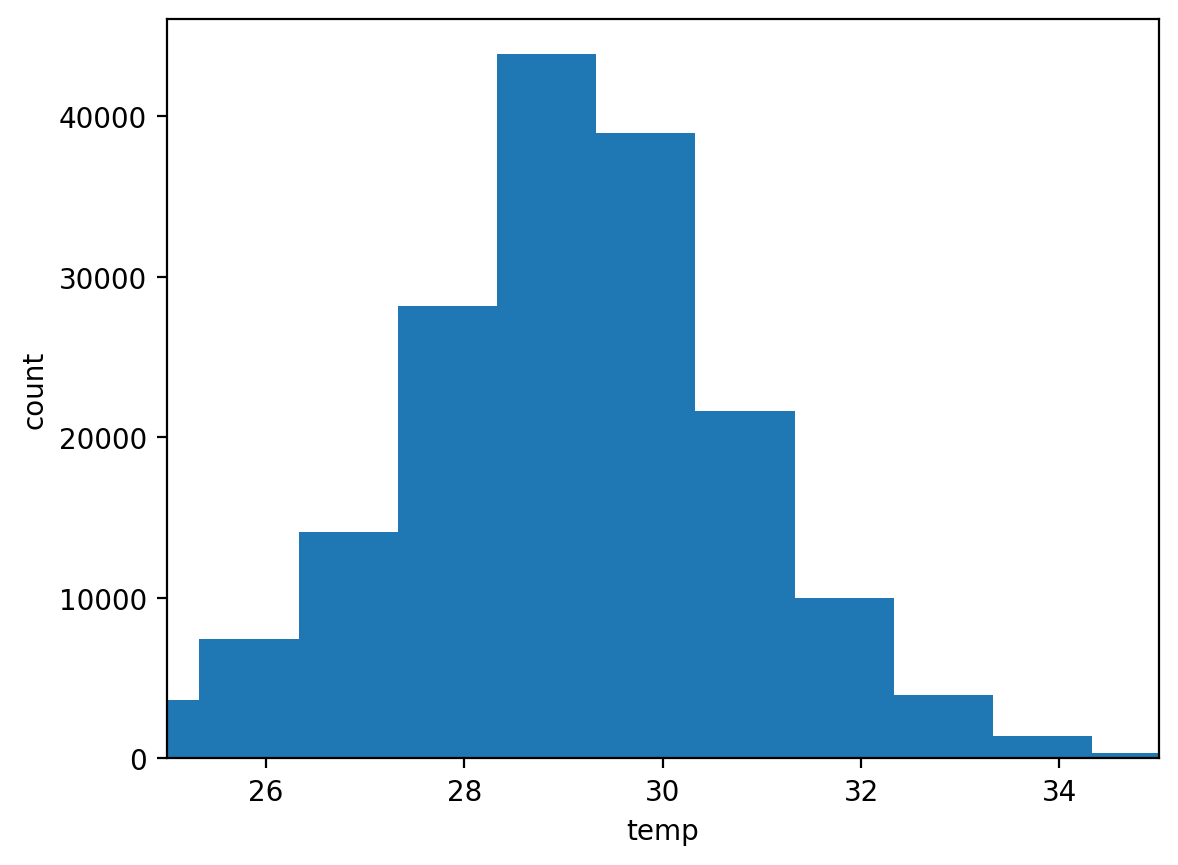

In [6]:
#sns.countplot(data=df, x='temp');
bins = np.arange(df['temp'].min(), df['temp'].max() + 1, 1)
plt.hist(data=df, x='temp', bins = bins)
plt.xlabel('temp')
plt.ylabel('count')
plt.xlim((25, 35));

In [7]:
q1 = df['temp'].quantile(0.25)
q3 = df['temp'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['temp'] < lower_bound) | (df['temp'] > upper_bound)]
outliers

,date,temp
307,2024-12-01 17:30:40,24.16
308,2024-12-01 17:20:40,23.38
309,2024-12-01 17:10:40,23.32
2574,2024-11-15 23:40:40,23.64
2575,2024-11-15 23:30:40,18.85
...,...,...
178376,2021-04-19 21:57:26,24.41
178377,2021-04-19 21:47:26,24.31
179285,2021-04-13 14:27:26,33.68
179286,2021-04-13 14:17:26,34.51


In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df['month'] = df['date'].dt.month
df.head()

,date,temp,month
0,2024-12-03 20:40:40,28.15,12
1,2024-12-03 20:30:40,28.05,12
2,2024-12-03 20:20:40,27.89,12
3,2024-12-03 20:10:40,27.72,12
4,2024-12-03 20:00:40,27.52,12


In [10]:
df.sample(10)

,date,temp,month
55478,2023-10-06 19:53:09,28.39,10
12221,2024-08-10 21:01:30,28.05,8
832,2024-11-28 02:00:40,28.50,11
77023,2023-05-06 08:10:48,29.62,5
148444,2021-12-10 11:51:06,29.43,12
32586,2024-03-18 06:15:32,27.74,3
131640,2022-04-06 05:29:53,29.29,4
79727,2023-04-17 13:30:59,28.86,4
20412,2024-06-10 19:14:45,25.55,6
149626,2021-12-02 06:51:08,30.21,12


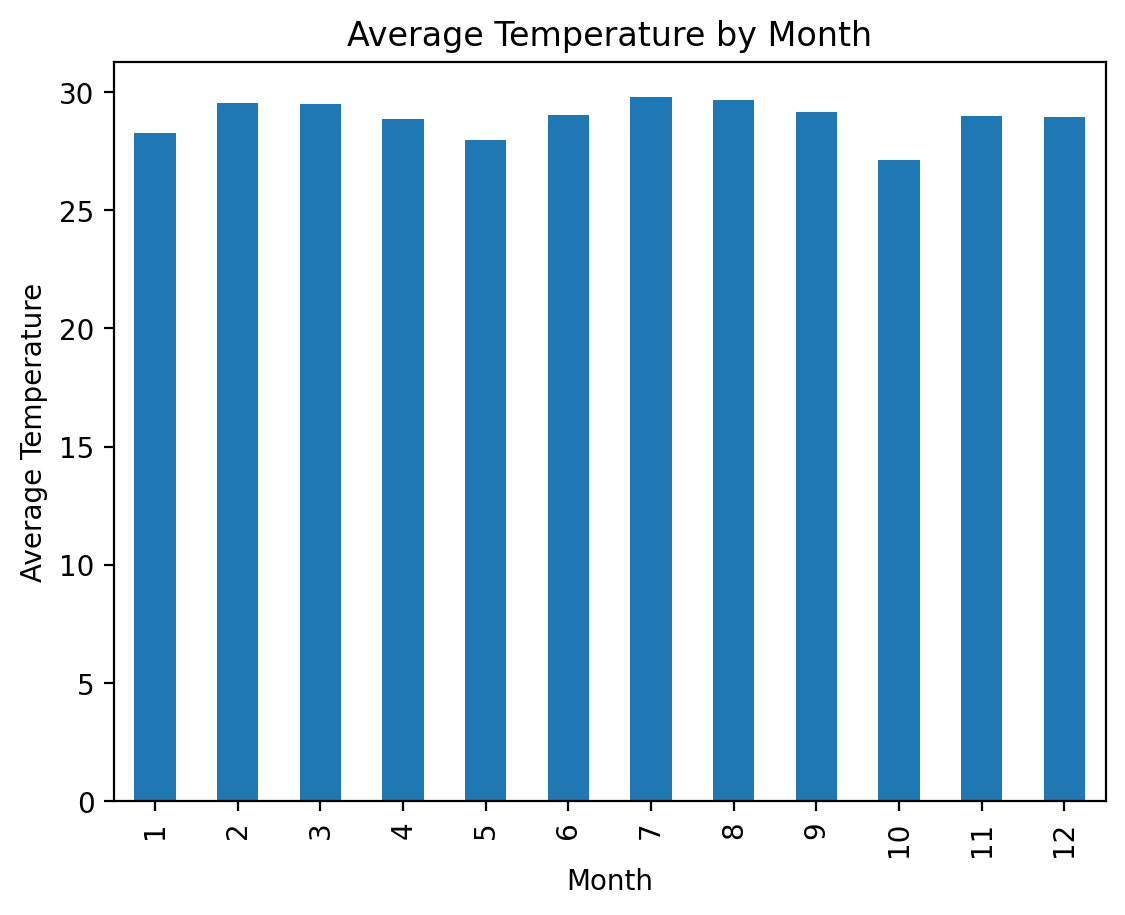

In [11]:
monthly_avg = df.groupby('month')['temp'].mean()
monthly_avg.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by Month')
plt.show()

In [ ]:
df['hour'] = df['date'].dt.hour
df.head()

,date,temp,month,hour
0,2024-12-03 20:40:40,28.15,12,20
1,2024-12-03 20:30:40,28.05,12,20
2,2024-12-03 20:20:40,27.89,12,20
3,2024-12-03 20:10:40,27.72,12,20
4,2024-12-03 20:00:40,27.52,12,20


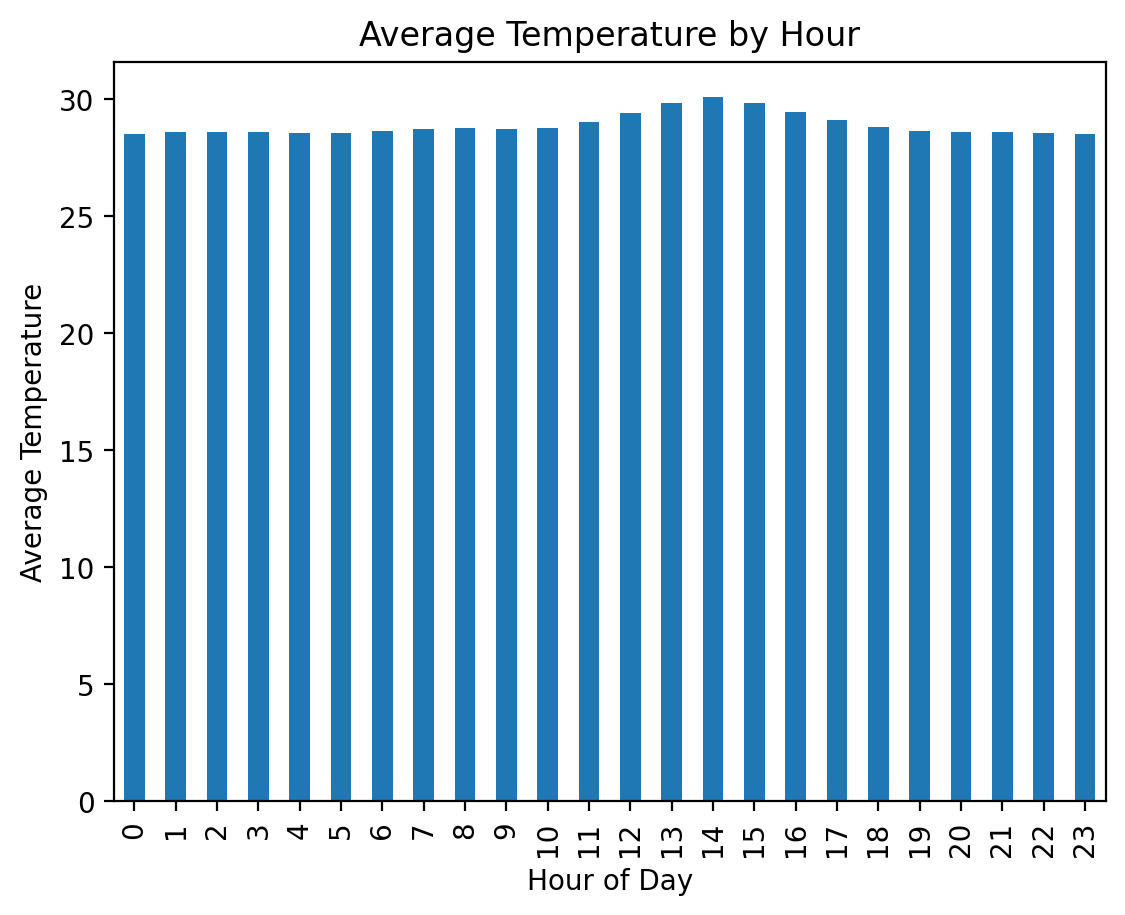

In [13]:
hourly_avg = df.groupby('hour')['temp'].mean()
hourly_avg.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by Hour')
plt.show()

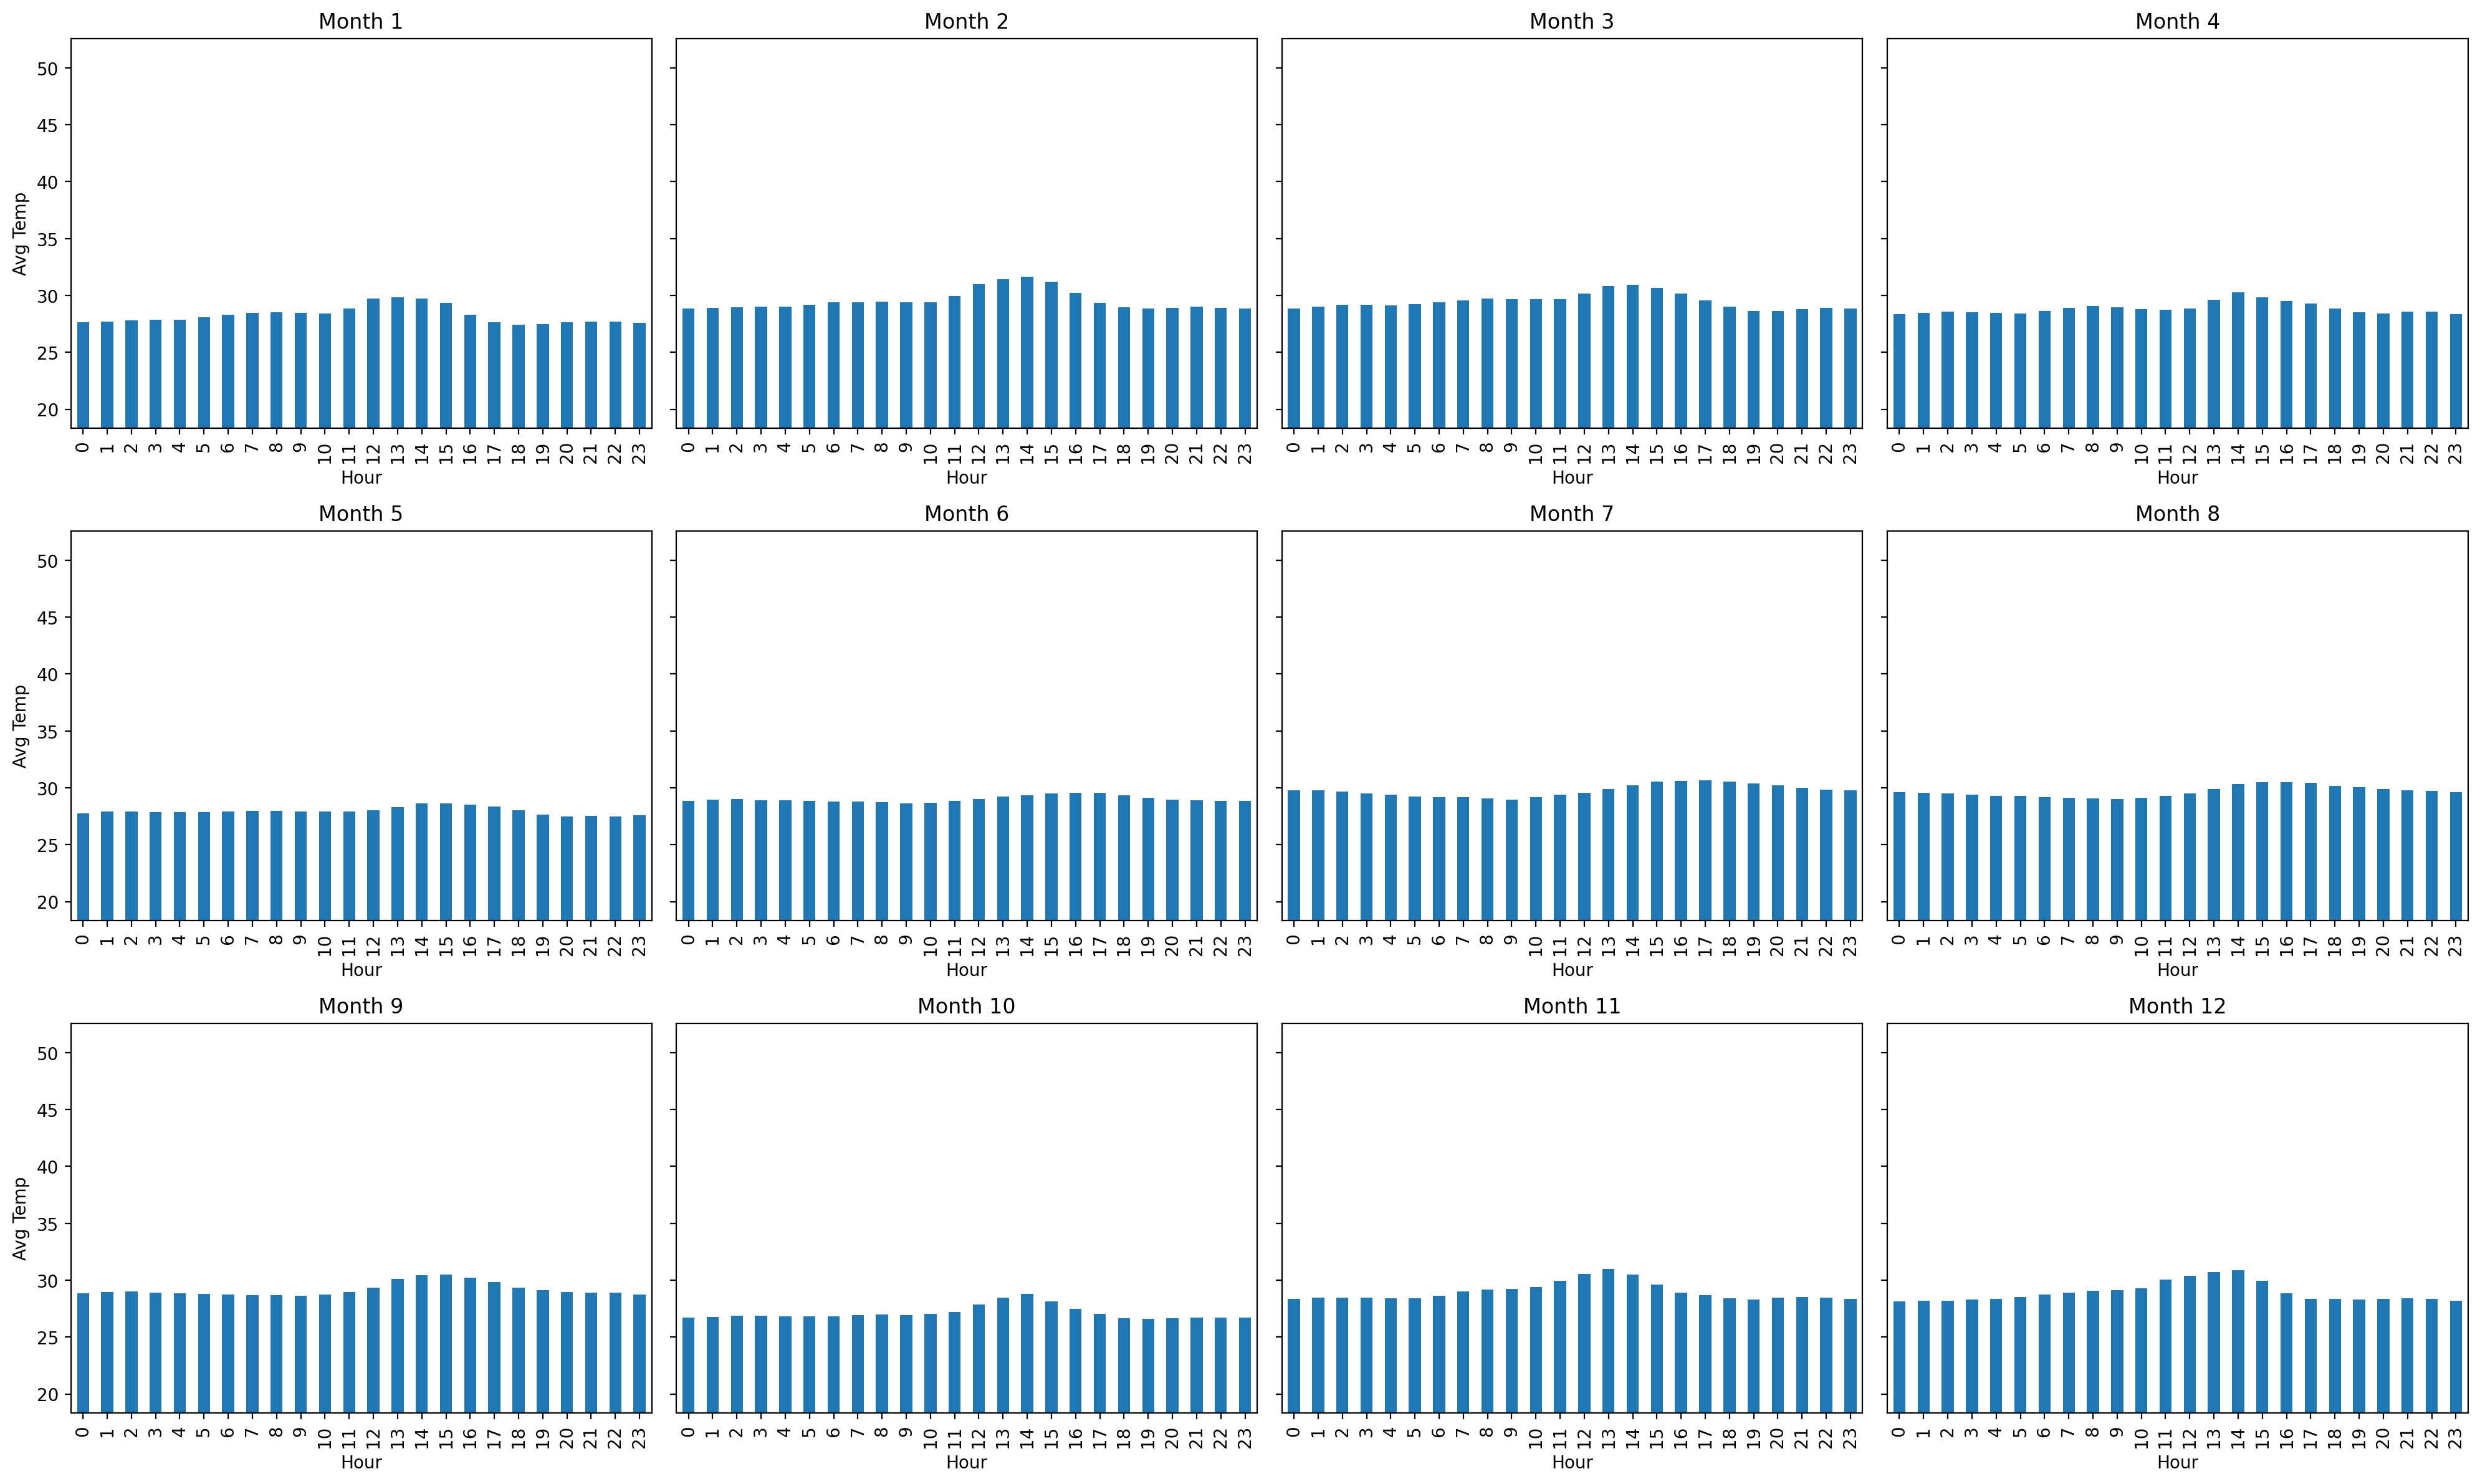

In [14]:
fig, axes = plt.subplots(3, 4, figsize=(20, 12), sharey=True)
for i, month in enumerate(range(1, 13)):
    ax = axes[i // 4, i % 4]
    hourly_avg_month = df[df['month'] == month].groupby('hour')['temp'].mean()
    hourly_avg_month.plot(kind='bar', ax=ax)
    ax.set_title(f'Month {month}')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Avg Temp' if i % 4 == 0 else '')
    ax.set_ylim(df['temp'].min(), df['temp'].max())
plt.tight_layout()
plt.show()

In [ ]:
# df.to_csv('temps2.csv', index=False)